<h1 align="center"> How to use the AutoPhOT code to perform photometry on an image</h1> 

Before running this noteook, make sure you have AutoPhoT installed ([check here for details](https://github.com/Astro-Sean/autophot)).

This notebook will use pre-packaged fits images for demonstration purposes. We will descirbe how to use your own data.

In [1]:
# First import autophot to ensure it is installed correctly
import autophot

AutoPhOT requires some instructions to know where the files are and where the transient is.

<div class="alert alert-success">
Many of these are initial guesses and will be changed during image analysis - although
    <a href="https://autophot.readthedocs.io/en/latest/">check here</a> for full list of commands.
</div>


In [2]:
# Load default input yaml file
from autophot.prep_input import load
autophot_input = load()

Default input loaded in from: 
/Users/seanbrennan/miniconda3/envs/autophot/lib/python3.7/site-packages/autophot/databases/default_input.yml


We will now use a pre-packaged fits image for the purpose of demonstration. 

<div class="alert alert-danger">
  You can ignore/delete the following cell if you are using your own data!
</div>


In [3]:
# Built in function to move some example data onto the users desktop
from autophot.example import save_example_data
fpath = save_example_data.save_fits_to_desktop()

# Lets get the parent dictionary of this new example image
import os
dirpath = os.path.dirname(fpath)

print('\nWe are looking for fits images in the folder: %s' % dirpath)

Successful copy of example.fits written to: /Users/seanbrennan/Desktop/autophot_example/example.fits

We are looking for fits images in the folder: /Users/seanbrennan/Desktop/autophot_example


<h2 align="center">Using your own Data</h2> 

If you are using your own data, update the **fits_dir** value in the autophot_input dictionary.

AutoPhOT will look though (using os.walk) the folder searching for images that end with .fits,.fts or .fit. 

For example:
    dirpath = '/Users/yourname/Desktop/SN1987A'


<div class="alert alert-success" role="alert">
The fits_dir can contain as many images as you like from different filters, different telescopes, etc. Folder structure is taken into account. 

However all images should contain the same target e.g. the same supernova.
</div>

In [4]:
autophot_input['fits_dir'] = dirpath

<h2 align="center">Unique keywords found in different headers</h2> 

AutoPhOT will build a database of telescope information that is saved to the users local machine.

<div class="alert alert-danger" role="alert">
  An image is required to have the *Telescop* and *Instrume* keywords, else the code will fail.
</div>

*telescope.yml* will be created and keeps track of different file naming conventions e.g. Filter header keys, Gain key etc. This file is stored in **wdir**. 

For this example we will set **wdir** to be the same directory as our example image. 

<div class="alert alert-success" role="alert">
  In practice we recommend wdir be set to a generic directary .i.e not associated with any specific database.
    
  For example autophot_input['wdir'] = /Users/yourname/Desktop/AutoPhoT_database
</div>

In [5]:
print('Setting work directory (wdir) to: %s' % dirpath)

# set working directory to the parent directory of our fits image
autophot_input['wdir'] = dirpath

Setting work directory (wdir) to: /Users/seanbrennan/Desktop/autophot_example


   <h2 align="center">What catalog to use?</h2> 

Currenlty AutoPhot needs to be told what catalog to use: 


* Currently available:
    - Pan-STARRS,
    - APASS,
    - 2MASS
    - Skymapper
    - SDSS
 
 
 <div class="alert alert-success" role="alert">
    To use your own catalog, check here for <a href="https://github.com/Astro-Sean/autophot/blob/master/example_notebooks/add_your_catalog_example.ipynb">example of using your own sequence stars</a>
</div>

In [6]:
# Options are skymapper, 2mass, pan_starrs, sdss, apass 
autophot_input['catalog']['use_catalog'] = 'skymapper'

   <h2 align="center">Where are we looking?</h2> 

AutoPhoT needs to know where to perform transient astronomy. This can be done in two ways:


* **target_name** give the TNS IAU name ignore SN/AT e.g. SN 1987A => 1987A. 

* **target_ra**/**target_dec** give ra/dec in degrees (all coords in AutoPhOT use degrees).

For this example we will use the Ra and Dec of a known star in the image.

If we know the IAU name we can update target_name (leave out the prefix i.e. SN or AT). 
For example: syntax['target_name'] = 1987A

<div class="alert alert-warning" role="alert">
  Using the target_name keyword requires access to the TNS server bot. Please see the <a href="https://www.wis-tns.org/">TNS website</a> for details.
</div>


In [7]:
# Position of a source in the image
# This source is not a transient although it is close to the center of the galaxy (NGC 2442)
ra = 114.070433
dec = -69.529716

autophot_input['target_ra'] = ra
autophot_input['target_dec'] = dec

print('Performing photometry on source at ra/dec = %.6f/%.6f' %  (ra,dec))

Performing photometry on source at ra/dec = 114.070433/-69.529716


<h3 align="center">Lets display the image (not required)</h3> 

For the purpose of demonstartion, we will display the image in this notebook.


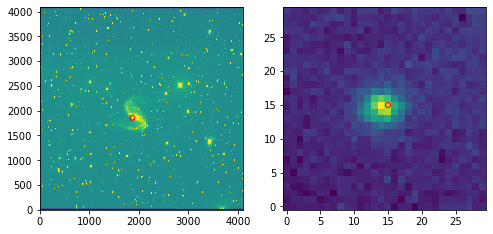

In [8]:
# We will plot out the image 
import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize,SquaredStretch,ZScaleInterval


# autophot functions to find image data and header from fits files
from autophot.packages.functions import getimage
from autophot.packages.functions import getheader

# To retrieve the WCS information from this image
from astropy import wcs
from astropy.coordinates import SkyCoord 

# image
data = getimage(fpath)

# header
header = getheader(fpath)

# Create an ImageNormalize object
vmin,vmax = (ZScaleInterval(nsamples = 1000)).get_limits(data)

# WCS information of image
w = wcs.WCS(header)

# get pixel coordinates of this source
c = SkyCoord(ra,dec , unit="deg") 
x_pix,y_pix = w.all_world2pix(c.ra.degree, c.dec.degree, 1)


# plot image
fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(data,
          vmin = vmin,
          vmax = vmax,
          origin = 'lower',
          cmap = 'viridis')

ax1.scatter(x_pix,y_pix,
            marker = 'o',
            facecolor = 'none',
            edgecolor = 'r',
            s = 25)

# Plot a close up cutout of the source too
cutout_size = 15
cutout = data[int(y_pix-cutout_size):int(y_pix+cutout_size),
              int(x_pix-cutout_size):int(x_pix+cutout_size)]

ax2.imshow(cutout,
           origin = 'lower',
           cmap = 'viridis')

ax2.scatter(cutout_size,cutout_size,
            marker = 'o',
            facecolor = 'none',
            edgecolor = 'r',
            s = 25)


plt.show()

<h3 align="center">Ready to go!</h3> 

That is it - we are ready to run the most basic version of AutoPhoT


<div class="alert alert-danger" role="alert">
  For this demonstration, example.fits has trusted wcs already in the header. AutoPhOT will detect wcs keywords (CRVAL1, CRVAL2, etc) and skip over this step. If the user wants to force new astrometry, regardless of what is already written, set **remove_wcs** to True.
</div>


<div class="alert alert-danger" role="alert">
Before starting, AutoPhOT will run through all files and ensure all keywords are known. It will ask the user to clariy any non-standard keywords. This may take away from the automation side of things but such steps only need to be taken once and it allows smoother operations if working with many files.
</div>


For the purpose of this example there is no need in input scale_type or scale_units as we will not be needed for input into astrometry.net so user can type *skip*. You'll see that if you rerun the script it won't ask you for this parameters as it check the pre-existing keys beforehand.

***We recommend you familirise yourself with this  example on how telescope.yml works see [here](https://github.com/Astro-Sean/autophot/blob/master/example_notebooks/example_call_database.ipynb) ***


In [9]:
# Import automated photometry script and pass input dictionary
from autophot.autophot_main import run_automatic_autophot

run_automatic_autophot(autophot_input)


        _       _       ___ _  _    _____
       /_\ _  _| |_ ___| _ \ || |__|_   _|
      / _ \ || |  _/ _ \  _/ __ / _ \| |
     /_/ \_\_,_|\__\___/_| |_||_\___/|_|
    
     ---------------------------------------
        Automated Photometry of Transients
        S. J. Brennan et al. 2021 
        Please provide feedback/bugs to:
        Email: sean.brennan2@ucdconnect.ie
    ---------------------------------------
Directory of fits file: /Users/seanbrennan/Desktop/autophot_example
Found Telescopes:

 - EXAMPLE_TELESCOPE

-> Telescope check complete

Checking Filter keywords and database

-> Filter check complete

Checking Filter information for each image

Files removed - Wrong Image Type: 0

Files removed - No/Wrong filter(s): 0
Filters not included: []


Files removed: 0

+-----------+
|File: 1 / 1|
+-----------+



File: example_APT.fits - PID: 31797
Start Time: 2022-01-05 15:25:49.189114
Filter keyoward used: FIL_WHL1
Telescope: EXAMPLE_TELESCOPE
Filter: r
MJD: 58849.000
Date of Observation : 2020-01-01
Read Noise: 0.0 [e^- /pixel]
GAIN: 1.0 [e^- /count]
Exposure time: 60 [s] 
Detecting/removing cosmic ray sources


Starting Astroscrappy ... 

Contaminated pixels with Cosmic rays removed: 4048
Cosmic rays removed - image updated
WCS found

Searching for FWHM
Using Gaussian Profile for fitting



+-------------------------------+
|Finding Full Width Half Maximum|
+-------------------------------+




Number of sources before cleaning [ 25.0 sigma ]: 25 
Updating search FWHM value


Updated guess for FWHM: 5.3 pixels 



Number of sources before cleaning [ 25.0 sigma ]: 777 
Too many sources - increasing threshold

Number of sources before cleaning [ 50.0 sigma ]: 490 
Too many sources - increasing threshold

Number of sources before cleaning [ 100.0 sigma ]: 309 
Too many sources - increasing threshold

Number of sources before cleaning [ 200.0 sigma ]: 186 
Removed 3 sources near boundary
Removed 4 crowded sources


Fitting source for FWHM: 179/179  

Removed 21 saturated sources
Input data contains invalid values (NaNs or infs), which were automatically clipped.
Removed 22 FWHM outliers
Input data contains invalid values (NaNs or infs), which were automatically clipped.
Removed 53 median outliers
Useable sources found [ 200 sigma ]: 179
Removes 0 sources within minimum seperation [ 23 pixel ]

FWHM: 4.621 +/- 0.148 [ pixels ]

Seeing: 1.800 [ arcsec ]
Aperture size: 7.9 pixels
Aperture correction: -0.061 +/- 0.003 [ mag ]
Catalog found for target_ra_114_dec_-70
Catalog: SKYMAPPER 
File: target_ra_114_dec_-70_r_0.25
Catalog length: 1622
Removed 0 sources fainter than cutoff [20 mag]
Using Gaussian Profile for fitting
Catalog Length: 770



+-----------------------------------------------+
|Searching for catalog for target_ra_114_dec_-70|
+-----------------------------------------------+


+---------------------------------+
|Matching catalog sources to image|
+---------------------------------+

Removed 1 sources too close to target
Removed 98 sources too close to boundary or off image
Matching catalog to image: 317 / 770 :: Useful sources 298 / 770 


Median offset: 2.3 [ pixels ] / 0.9 [ arcsec ]


Matching catalog to image: 319 / 770 :: Useful sources 300 / 770   .. done

Broken cutouts: 0
Not in correct location: 0
Not detected: 0
Saturated: 19
Error: 0



Residual table updated: 1 / 10 
	SNR: 599 :: FWHM fitted 4.798



+-------------------------------------------+
|Building PSF model using stars in the field|
+-------------------------------------------+



Residual table updated: 2 / 10 
	SNR: 585 :: FWHM fitted 4.795
Residual table updated: 3 / 10 
	SNR: 555 :: FWHM fitted 4.541
Residual table updated: 4 / 10 
	SNR: 520 :: FWHM fitted 4.643
Residual table updated: 5 / 10 
	SNR: 512 :: FWHM fitted 4.627
Residual table updated: 6 / 10 
	SNR: 509 :: FWHM fitted 4.742
Residual table updated: 7 / 10 
	SNR: 504 :: FWHM fitted 4.698
Residual table updated: 8 / 10 
	SNR: 492 :: FWHM fitted 4.735
Found faint soures near PSF star at 3 sigma - skipping 
Found faint soures near PSF star at 3 sigma - skipping 
Residual table updated: 9 / 10 
	SNR: 469 :: FWHM fitted 4.657
Residual table updated: 10 / 10 
	SNR: 467 :: FWHM fitted 4.431

PSF built using 10 sources

Unity PSF: 27.3 [counts] 
Unity Residual table: 3.0 [counts] 
Using PSF Photometry on Sequence Stars
Approx PSF mag -9.492 mag


PSF model saved as: /Users/seanbrennan/Desktop/autophot_example_REDUCED/example/PSF_model_example_APT.fits

+-------------------+
|Measuring PSF model|
+-------------------+


+-----------------------------------+
|Fitting PSF to sources in the image|
+-----------------------------------+

Fitting PSF to source: 300 / 300 


Mean r-band zeropoint: 23.110 +/- 0.041 




+-----------------------+
|Finding Zeropoint value|
+-----------------------+

Checking for suitable catalog sources
Removed 300 sources lower than SNR of 10.0


Target photometry on original image



+-----------------------------------------------+
|Performing PSF photometry on at target location|
+-----------------------------------------------+



Approximate Target SNR: 56.2
SNR = 56 - skipping limiting magnitude
Pixel Offset: 1.054
Limiting Magnitude: skipped
Target Detection probability: 100 %
Target flux: 178.346 +/- 2.620 [counts/s]
Noise: 70.415 [counts/s]
Target SNR: 56.186 +/- 0.019
Instrumental Magnitude: -5.628 +/- 0.046
Zeropoint: 23.110 +/- 0.041
Target Magnitude: 17.482 +/- 0.077 

*** Transient well detected ***

Time Taken [ 31797 ]: 118s
Sucess: example_APT.fits :: PID 31797 



Error from multlocation [10] recovery: 0.043 [mag]

---

Files that failed : []

DONE

Done - Time Taken: 138.1


<h3 align="center">Looking at the outputs!</h3> 


Output of AutoPhOT will be given in folder in the parent dictionary of the fits_folder, below we display some of the visual outputs

For example if the **fits_dir** is set to */Users/seanbrennan/Desktop/autophot_example* the ouput folder will be */Users/seanbrennan/Desktop/autophot_example_REDUCED*

Each image will have a *out.csv*. Once AutoPhOT has completed each file in a folder it will collect all these files into one file named *REDUCED.csv* in the output folder



 <div class="alert alert-success" role="alert">
  Checking the SkyMapper catalog, this source has r =  17.491 +/- 0.011 mag. 
The AutoPhoT output gives r = 17.482 +/- 0.077 mag
</div>
